In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Creating utilities:
def mse(y_true, y_pred):
    """
    Mean squared error loss function: L = (1/n) * sum((y_true - y_pred)^2)

    Parameters:
    -----------
    y_true : array-like
        Ground truth target values
    y_pred : array-like
        Predicted values

    Returns:
    --------
    float
        Mean squared error value
    """
    return np.mean(np.square(y_true - y_pred))

def r2_score(y_true, y_pred):
    """
    Calculate R² coefficient of determination.

    Parameters:
    -----------
    y_true : array-like
        Ground truth target values
    y_pred : array-like
        Predicted values

    Returns:
    --------
    float
        R² score
    """
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total) if ss_total > 0 else 0

def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Split arrays into random train and test subsets.

    Parameters:
    -----------
    X : array-like
        Features data
    y : array-like
        Target data
    test_size : float, default=0.2
        Proportion of the dataset to include in the test split
    random_state : int, default=None
        Controls the shuffling applied to the data

    Returns:
    --------
    X_train, X_test, y_train, y_test : arrays
        Train and test splits of the input data
    """
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    test_samples = int(n_samples * test_size)
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [4]:
# Linear Regression Implementation using Gradient Descent
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, verbose=False):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.verbose = verbose
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if self.verbose and i % 100 == 0:
                loss = mse(y, y_predicted)
                print(f"Iteration {i}: MSE = {loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        return {
            "mse": mse(y, y_pred),
            "r2_score": r2_score(y, y_pred)
        }

Iteration 0: MSE = 6602.3316
Iteration 100: MSE = 219.0687
Iteration 200: MSE = 217.2875
Iteration 300: MSE = 217.2869
Iteration 400: MSE = 217.2868
Iteration 500: MSE = 217.2868
Iteration 600: MSE = 217.2868
Iteration 700: MSE = 217.2868
Iteration 800: MSE = 217.2868
Iteration 900: MSE = 217.2868
Evaluation: {'mse': np.float64(224.95001324323135), 'r2_score': np.float64(0.965827684975343)}


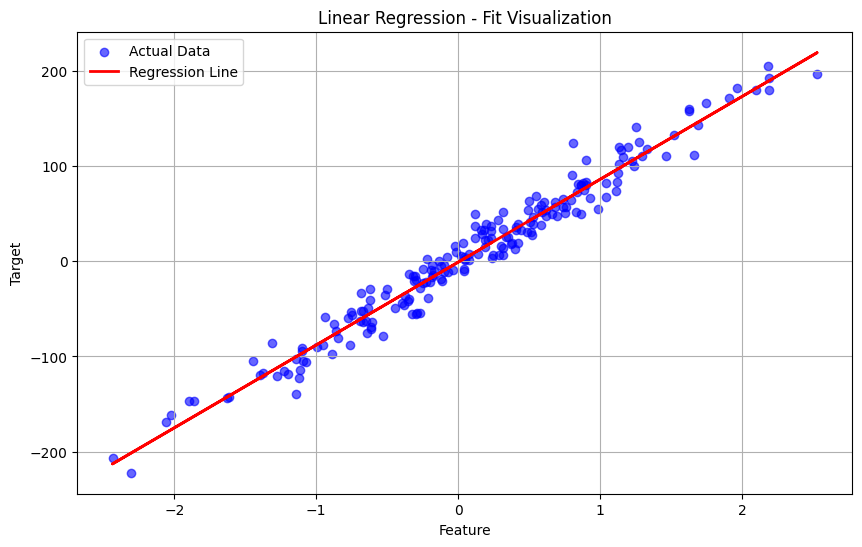

In [7]:
# Example implementation using sklearn's make_regression to generate a random dataset
from sklearn.datasets import make_regression
# Dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=1)
#X = normalize(X)  # Optional normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = LinearRegression(learning_rate=0.05, n_iters=1000, verbose=True)
model.fit(X_train, y_train)

# Evaluation
results = model.evaluate(X_test, y_test)
print("Evaluation:", results)

# Visualize predictions vs actual data
y_pred_line = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data", alpha=0.6)
plt.plot(X, y_pred_line, color="red", label="Regression Line", linewidth=2)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression - Fit Visualization")
plt.legend()
plt.grid(True)
plt.show()